# Graphs

## What is a graph?

A graph is a representation of a system that contains discrete,
interconnected elements. The elements are represented by nodes|also called
vertices { and the interconnections are represented by edges.

## Path

A path is a sequence of nodes with an edge between each
consecutive pair.

## A directed graph:

In [28]:
!pip install networkx

import networkx as nx

# init graph
G = nx.DiGraph()

In [29]:
# add nodes

G.add_node("Alice")
G.add_node("Bob")
G.add_node("Chuck")

In [30]:
# display nodes

list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [31]:
# add edges

G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

In [32]:
# display edges

list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

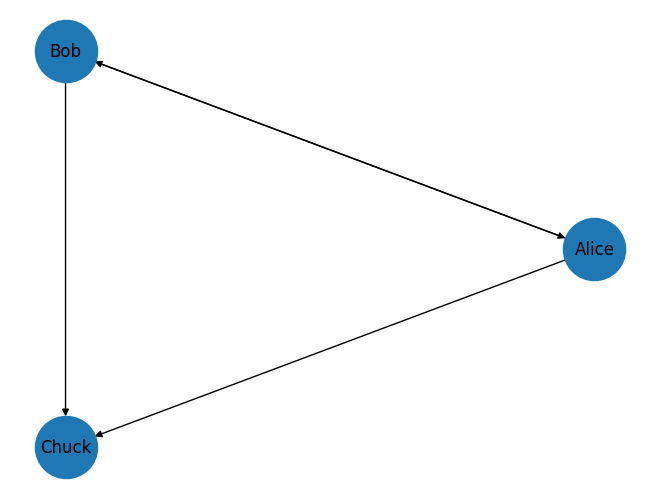

In [33]:
# draw_circular arranges nodes in a circle and connects them with edges

nx.draw_circular(
    G,
    node_color="C0",
    node_size=2000,
    with_labels=True
)

## An undirected graph:

In [34]:
# dictionary mapping city names to longitudes and latitudes

positions = dict(
    Albany=(-74, 43),
    Boston=(-71, 42),
    NYC=(-74, 41),
    Philly=(-75, 40)
)

In [35]:
# init graph
G = nx.Graph()

In [36]:
# add nodes using the dictionary
G.add_nodes_from(positions)

In [37]:
# dictionary of drive times between cities

drive_times = {
    ('Albany', 'Boston'): 3,
    ('Albany', 'NYC'): 4,
    ('Boston', 'NYC'): 4,
    ('NYC', 'Philly'): 2
}

In [38]:
# use dicitonary to add edges
G.add_edges_from(drive_times)

{('Albany', 'Boston'): Text(-72.50000641573571, 42.50000213857856, '3'),
 ('Albany', 'NYC'): Text(-74.0, 41.99998938268981, '4'),
 ('Boston', 'NYC'): Text(-72.49999358426432, 41.500002138578566, '4'),
 ('NYC', 'Philly'): Text(-74.49999546876644, 40.500004531233564, '2')}

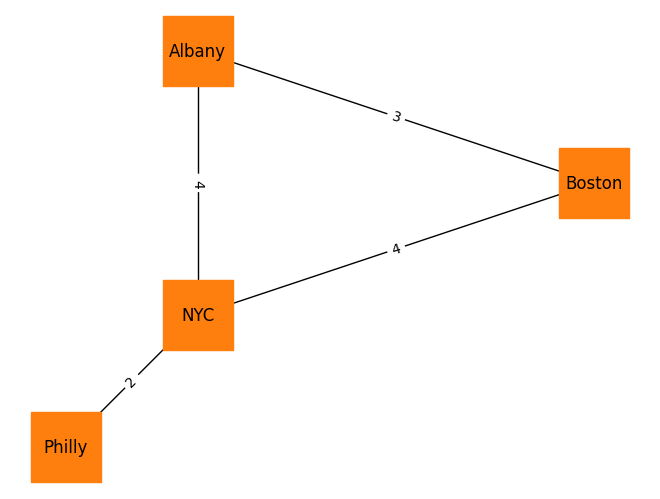

In [41]:
nx.draw(
    G,
    positions,
    node_color="C1",
    node_shape="s",
    node_size=2500,
    with_labels=True
)
nx.draw_networkx_edge_labels(
    G,
    pos=positions,
    edge_labels=drive_times
)

## Random graphs

A random graph is just what it sounds like: a graph with nodes and edges
generated at random. Of course, there are many random processes that can
generate graphs, so there are many kinds of random graphs.

One of the more interesting kinds is the Erdos-Renyi model, studied by Paul
Erdos and Alfred Renyi in the 1960s.

An Erdos-Renyi graph (ER graph) is characterized by two parameters: n is
the number of nodes and p is the probability that there is an edge between
any two nodes.

Erdos and Renyi studied the properties of these random graphs; one of their
surprising results is the existence of abrupt changes in the properties of random
graphs as random edges are added.

One of the properties that displays this kind of transition is connectivity. An
undirected graph is connected if there is a path from every node to every
other node.

In an ER graph, the probability that the graph is connected is very low when
p is small and nearly 1 when p is large. Between these two regimes, there is a
rapid transition at a particular value of p, denoted p*.

Erdos and Renyi showed that this critical value is p* = (ln n)=n, where n is
the number of nodes. A random graph, G(n, p), is unlikely to be connected if
p < p* and very likely to be connected if p > p*.

To test this claim, we'll develop algorithms to generate random graphs and
check whether they are connected.

## Generating 

### Complete graph

A graph where every node is connected to every other.

In [42]:
# generator function that takes a list of nodes and enumerates all distinct pairs

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i > j:
                yield u, v

In [43]:
# construct complete graph

def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

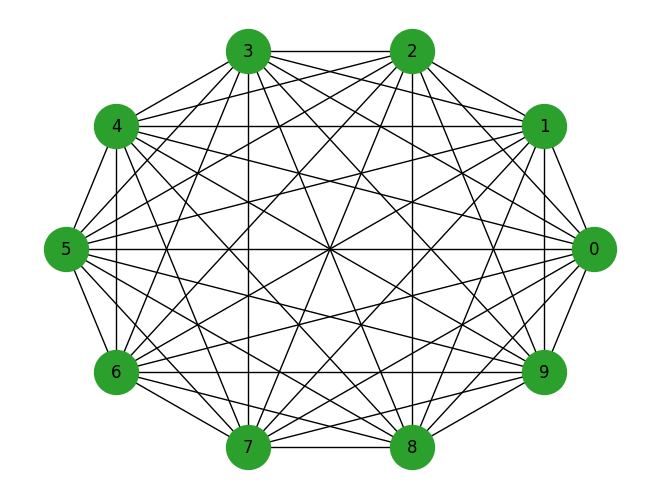

In [44]:
# complete graph with 10 nodes

complete = make_complete_graph(10)
nx.draw_circular(
    complete,
    node_color="C2",
    node_size=1000,
    with_labels=True
)

## Connected Graphs

A graph is connected if there is a path from every node to every other node.

In [49]:
# return neighbors of particular node
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [63]:
# returns list of nodes reachable from starting node

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [64]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [65]:
# check if graph is connected graph

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [66]:
is_connected(complete)

True